In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
from utils import img_parts_generator
import pickle
import scipy
import os

Using TensorFlow backend.


In [2]:
def plot_data(img):

    implot = plt.imshow(img)
    plt.show()


In [3]:
def get_save_path(path):
    save_img_dir = "/".join([save_path] + path[3:].split('/')[:2])
    print(save_img_dir)
    if not os.path.exists(save_img_dir):
        os.makedirs(save_img_dir)
    save_img_path = save_path + path[2:]
    return save_img_path

In [4]:
def crop(img, t_l_x, t_l_y, b_r_x, b_r_y):
    return img[t_l_y:b_r_y, t_l_x:b_r_x]

In [5]:
def resize(img, target_dim):
    return scipy.misc.imresize(img, target_dim)

In [6]:
part_file_name = 'parts_info.txt'
validation_data_dir = 'validation/'
batch_size = 1
steps=4
target_dim=None
cache=False
save_path = '../cropped_trained'

In [8]:
validation_generator = img_parts_generator(part_file_name, validation_data_dir, batch_size=batch_size, load_image=True, steps=steps, target_dim=target_dim, cache=False, load_paths=True)

49830
Images found in ../validation/: 3000


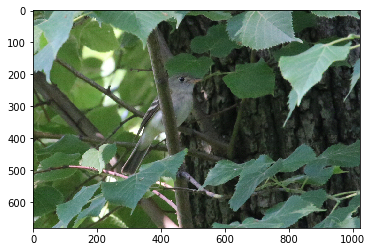

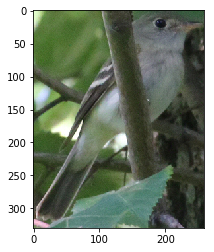

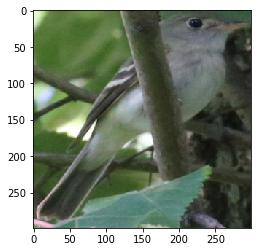

../cropped/validation/Acadian_Flycatcher


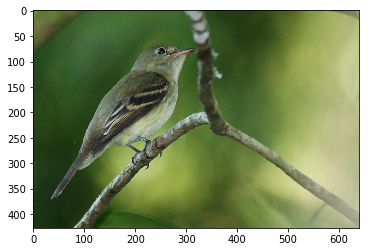

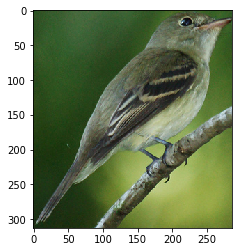

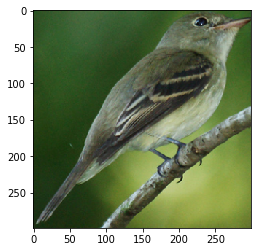

../cropped/validation/Acadian_Flycatcher


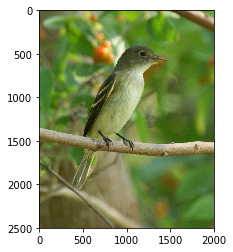

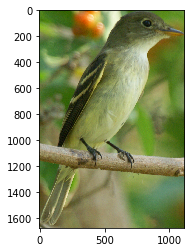

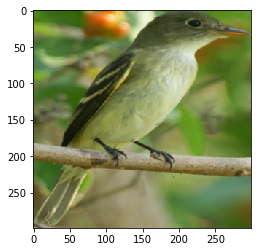

../cropped/validation/Acadian_Flycatcher


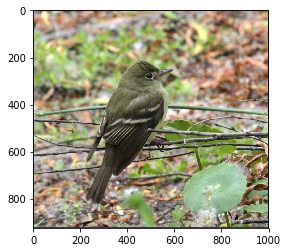

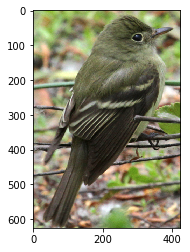

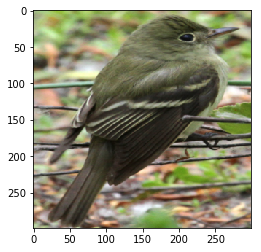

../cropped/validation/Acadian_Flycatcher


In [9]:
for imgs, parts, paths in validation_generator:
    for i in range(len(imgs)):
        
        img = imgs[i]
        path = paths[i]
        
        plot_data(img)
        
        t_l_x = parts[i][0]
        t_l_y = parts[i][1]
        b_r_x = parts[i][2]
        b_r_y = parts[i][3]
        
        
        crop_img = crop(img, t_l_x, t_l_y, b_r_x, b_r_y)
        plot_data(crop_img)
        
        resized_cropped_img = resize(crop_img, (299, 299))
        plot_data(resized_cropped_img)
        
        save_img_path = get_save_path(path)
        
        image = Image.fromarray(resized_cropped_img)
        image.save(save_img_path)
        
        